In [1]:
import sklearn.datasets as datasets
import pandas as pd
import numpy as np
data = datasets.load_boston()
df = pd.DataFrame(data.data,columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'])
df['MEDV'] = data.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [2]:
pre = df

In [3]:
df = df[df['MEDV']<50]

In [4]:
df.shape

(490, 14)

In [5]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer

scaler = RobustScaler()
for feature in df.columns:
    df[feature] = scaler.fit_transform(df[[feature]])
df.head()

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.069343,1.44,-0.571650,0.0,0.000000,0.559541,-0.235175,0.262313,-0.20,-0.088140,-1.357143,0.251347,-0.685261,0.388715
1,-0.063308,0.00,-0.202943,0.0,-0.394286,0.338594,0.042575,0.544924,-0.15,-0.228127,-0.464286,0.251347,-0.259468,0.087774
2,-0.063314,0.00,-0.202943,0.0,-0.394286,1.434720,-0.318297,0.544924,-0.15,-0.228127,-0.464286,0.051935,-0.782497,1.730408
3,-0.061854,0.00,-0.581720,0.0,-0.457143,1.166428,-0.628485,0.897778,-0.10,-0.279974,-0.142857,0.140127,-0.894063,1.567398
4,-0.051308,0.00,-0.581720,0.0,-0.457143,1.380201,-0.458186,0.897778,-0.10,-0.279974,-0.142857,0.251347,-0.649437,1.918495


In [6]:
dataSet = df.iloc[:,:-1]
#计算均值
meanVals = dataSet.mean(0)
meanVals

CRIM       0.970418
ZN         0.888980
INDUS      0.110236
CHAS       0.059184
NOX        0.093185
RM         0.086760
AGE       -0.172753
DIS        0.179993
RAD        0.225714
TAX        0.202209
PTRATIO   -0.207143
B         -1.759655
LSTAT      0.127842
dtype: float64

In [7]:
meanRemoved = dataSet - meanVals
meanRemoved.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-1.039761,0.55102,-0.681886,-0.059184,-0.093185,0.472781,-0.062422,0.082319,-0.425714,-0.290349,-1.150000,2.011002,-0.813103
1,-1.033726,-0.88898,-0.313179,-0.059184,-0.487471,0.251834,0.215327,0.364931,-0.375714,-0.430336,-0.257143,2.011002,-0.387310
2,-1.033732,-0.88898,-0.313179,-0.059184,-0.487471,1.347961,-0.145544,0.364931,-0.375714,-0.430336,-0.257143,1.811590,-0.910340
3,-1.032271,-0.88898,-0.691955,-0.059184,-0.550328,1.079668,-0.455732,0.717785,-0.325714,-0.482183,0.064286,1.899782,-1.021906
4,-1.021725,-0.88898,-0.691955,-0.059184,-0.550328,1.293441,-0.285433,0.717785,-0.325714,-0.482183,0.064286,2.011002,-0.777279


In [8]:
covMat = np.mat(np.cov(meanRemoved,rowvar = 0))
covMat

matrix([[ 6.28141877e+00, -9.07113750e-01,  5.37478586e-01,
         -3.76856033e-02,  6.96826634e-01, -5.17144944e-01,
          5.03367678e-01, -6.48138827e-01,  6.79479879e-01,
          6.33797697e-01,  5.39086590e-01, -4.28558681e+00,
          8.32830040e-01],
        [-9.07113750e-01,  3.34001245e+00, -5.09008541e-01,
         -2.32728183e-02, -6.24089983e-01,  5.31768948e-01,
         -5.87710431e-01,  8.36467021e-01, -2.44394975e-01,
         -2.41179595e-01, -5.25956763e-01,  1.46084868e+00,
         -5.59258213e-01],
        [ 5.37478586e-01, -5.09008541e-01,  2.79178583e-01,
          4.46996703e-03,  2.69573926e-01, -2.04198133e-01,
          1.92477975e-01, -2.55144535e-01,  1.36877518e-01,
          1.65212293e-01,  1.54387065e-01, -8.71459208e-01,
          2.43832318e-01],
        [-3.76856033e-02, -2.32728183e-02,  4.46996703e-03,
          5.57948333e-02,  1.34850942e-02,  9.95598599e-03,
          9.60241758e-03, -1.24783842e-02, -3.36546889e-03,
         -6.9715685

In [9]:
covMat.shape

(13, 13)

In [10]:
#计算方差矩阵的特征值和右特征向量
eigVals,eigVects = np.linalg.eig(covMat)
eigVals

array([2.24327874e+01, 5.70386531e+00, 3.49709650e+00, 9.05773291e-01,
       5.66606882e-01, 4.50320187e-01, 1.73664976e-01, 1.24959474e-01,
       1.26725615e-02, 8.43917879e-02, 5.30237215e-02, 7.02600558e-02,
       6.38980029e-02])

In [11]:
eigVals.shape

(13,)

In [12]:
eigVects

matrix([[-2.74039832e-01,  8.17598734e-01, -4.65535632e-01,
         -1.36851803e-01,  8.45664335e-02, -1.01893534e-01,
         -7.84890315e-03, -3.70839782e-02,  7.87408230e-03,
         -9.78523446e-03, -1.83883419e-03, -4.29487420e-02,
          2.51216171e-03],
        [ 9.77941730e-02, -3.38112381e-01, -8.16586820e-01,
          3.24905280e-01, -2.30630814e-01,  1.71056646e-01,
         -6.81474209e-04, -1.40013917e-01, -1.81893040e-02,
          3.25461264e-02,  6.09432986e-03,  6.40351693e-03,
          1.46726093e-02],
        [-4.98690369e-02,  9.46952676e-02,  1.06620705e-01,
          1.48918698e-01, -2.42819211e-01,  1.72192931e-01,
          2.56942692e-01,  7.89486185e-02, -1.85032230e-01,
          2.95067926e-01, -3.06652460e-03, -6.41977572e-01,
         -5.10578606e-01],
        [ 2.22391978e-03, -1.46361879e-03,  1.11929009e-02,
         -1.30689716e-02, -5.11310432e-02, -3.01580317e-02,
         -3.68575647e-03, -1.26637252e-02,  8.33103030e-02,
         -3.7485504

In [13]:
eigVects.shape

(13, 13)

In [14]:
#对特征值排序
eigvalInd = np.argsort(eigVals)
#提取出最大的N个特征
N = 4
eigvalInd = eigvalInd[:-(N+1):-1]
eigvalInd

array([0, 1, 2, 3], dtype=int64)

In [15]:
redEigVects = eigVects[:,eigvalInd]
redEigVects

matrix([[-0.27403983,  0.81759873, -0.46553563, -0.1368518 ],
        [ 0.09779417, -0.33811238, -0.81658682,  0.32490528],
        [-0.04986904,  0.09469527,  0.1066207 ,  0.1489187 ],
        [ 0.00222392, -0.00146362,  0.0111929 , -0.01306897],
        [-0.06552624,  0.11608332,  0.12634579,  0.12055701],
        [ 0.03510928, -0.12657118, -0.134795  , -0.79919854],
        [-0.04347764,  0.10227013,  0.13078524,  0.06902656],
        [ 0.05567516, -0.13366342, -0.18286047,  0.01346029],
        [-0.04991395,  0.08607292,  0.00224614,  0.03714351],
        [-0.04943918,  0.08209467,  0.01202667,  0.09326235],
        [-0.03757264,  0.10849695,  0.10101306,  0.14805145],
        [ 0.94404914,  0.32578767, -0.00230133,  0.01720585],
        [-0.06895002,  0.13551762,  0.0996744 ,  0.40357112]])

In [16]:
redEigVects.shape

(13, 4)

In [17]:
lowDDataMat = np.mat(meanRemoved) * redEigVects
lowDDataMat[:10]

matrix([[ 2.43605836, -0.82922334, -0.3442816 , -0.67842483],
        [ 2.23845099, -0.18228044,  0.96377865, -0.64735603],
        [ 2.14043476, -0.49377525,  0.71715854, -1.7627982 ],
        [ 2.26569515, -0.53214055,  0.61985902, -1.62812298],
        [ 2.35103659, -0.4637742 ,  0.63253372, -1.68802055],
        [ 2.18630188, -0.37949462,  0.78746419, -0.86535017],
        [ 2.24385071, -0.48876222,  0.13926888,  0.19618023],
        [ 2.24117641, -0.34626155,  0.22444796,  0.33216104],
        [ 1.65648495, -0.24432851,  0.43387114,  1.39252409],
        [ 1.79434297, -0.54963248,  0.1689128 ,  0.41902989]])

In [18]:
reconMat = (lowDDataMat * redEigVects.T) + np.mat(meanVals)
reconMat

matrix([[-1.22012408e-01,  1.46829459e+00, -2.27509402e-01, ...,
         -5.23858931e-01,  2.59072858e-01, -4.60606951e-01],
        [-1.52120897e-01,  1.72179990e-01, -1.22994496e-02, ...,
         -3.09512020e-01,  2.80812102e-01, -2.16391161e-01],
        [-1.12477586e-01,  1.06888510e-01, -2.29313566e-01, ...,
         -5.29680209e-01,  6.81742145e-02, -7.26587937e-01],
        ...,
        [ 5.23818625e-03, -3.02166548e-01, -2.51617286e-02, ...,
         -3.21682849e-01,  2.41915480e-01, -3.40394179e-01],
        [ 1.09571597e-03, -2.54390420e-01,  1.97901511e-02, ...,
         -2.79341979e-01,  7.86886493e-02, -2.32380398e-01],
        [-8.18843317e-02, -1.14954041e-01,  1.83346310e-01, ...,
         -1.13404448e-01,  2.70317632e-01,  1.71255685e-01]])

In [19]:
reconMat.shape

(490, 13)

In [20]:
import matplotlib.pyplot as plt
plt.scatter(df.iloc[:,5],df.iloc[:,13],marker = '.',c = 'orange')
plt.scatter(reconMat[:,5].A.flatten(),np.mat(df.iloc[:,13]).A.flatten(),marker = '*',c = 'g')

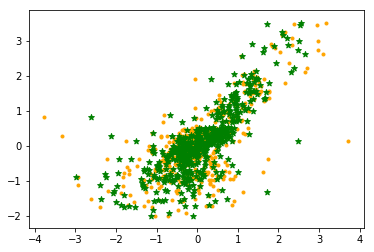

In [21]:
plt.show()

In [22]:
eigVals.sum()

34.13932013678725

In [23]:
y = np.array(eigVals/eigVals.sum())

In [24]:
y

array([6.57095317e-01, 1.67076125e-01, 1.02436032e-01, 2.65316734e-02,
       1.65969000e-02, 1.31906607e-02, 5.08694888e-03, 3.66028010e-03,
       3.71201344e-04, 2.47198209e-03, 1.55315692e-03, 2.05803910e-03,
       1.87168352e-03])

In [25]:
x = np.linspace(1,13,13)

In [26]:
x

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.])

In [27]:
plt.plot(x,y,marker = '.')

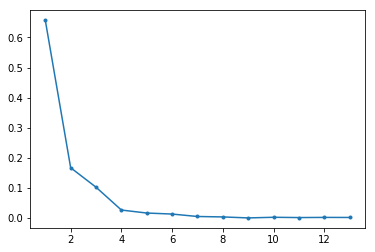

In [28]:
plt.show()

In [29]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

#http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor

X = reconMat

y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)


tree = DecisionTreeRegressor(max_depth=3)   #max_depth设置树深

tree.fit(X, y)   #参考官网attributes部分了解建模后得到的各种属性:树，使用的特征及特征重要性

y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)
from sklearn.metrics import r2_score

from sklearn.metrics import mean_squared_error   #均方误差回归损失


print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))

print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test, y_test_pred)))


MSE train: 0.186, test: 0.136
R^2 train: 0.820, test: 0.810


In [30]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

#http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor

X = pre.iloc[:,:-1]

y = pre.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)


tree = DecisionTreeRegressor(max_depth=3)   #max_depth设置树深

tree.fit(X, y)   #参考官网attributes部分了解建模后得到的各种属性:树，使用的特征及特征重要性

y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)
from sklearn.metrics import r2_score

from sklearn.metrics import mean_squared_error   #均方误差回归损失


print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))

print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test, y_test_pred)))


MSE train: 15.351, test: 15.711
R^2 train: 0.828, test: 0.756


In [31]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    print(test_scores_mean)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


In [32]:
estimator = DecisionTreeRegressor(max_depth=3)
title = "Learning Curves"
X = np.array(reconMat)
y = np.array(df.iloc[:,-1])
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
plot_learning_curve(estimator, title, X, y, ylim=(0.1, 1.01), cv=cv, n_jobs=4)


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\model_selection\_validation.py:1103: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if np.issubdtype(train_sizes_abs.dtype, np.float):


[0.57395951 0.69354385 0.72160916 0.72536108 0.73188599]


<module 'matplotlib.pyplot' from 'C:\\Program Files (x86)\\Microsoft Visual Studio\\Shared\\Anaconda3_64\\lib\\site-packages\\matplotlib\\pyplot.py'>

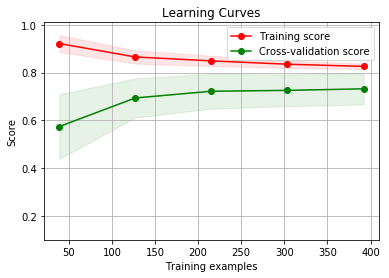

In [33]:
plt.show()

In [34]:
estimator = DecisionTreeRegressor(max_depth=3)
title = "Learning Curves"
X = np.array(pre.iloc[:,:-1])
y = np.array(pre.iloc[:,-1])
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
plot_learning_curve(estimator, title, X, y, ylim=(0.1, 1.01), cv=cv, n_jobs=4)


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\model_selection\_validation.py:1103: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if np.issubdtype(train_sizes_abs.dtype, np.float):


[0.41191454 0.63159578 0.68944156 0.65896137 0.66313563]


<module 'matplotlib.pyplot' from 'C:\\Program Files (x86)\\Microsoft Visual Studio\\Shared\\Anaconda3_64\\lib\\site-packages\\matplotlib\\pyplot.py'>

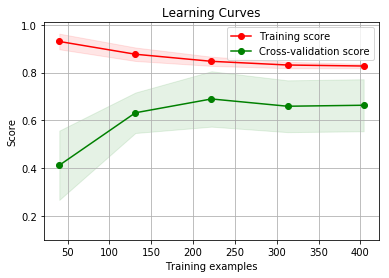

In [35]:
plt.show()

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
X = np.array(reconMat)
y = np.array(df.iloc[:,-1])
depth = list(range(1,11))
param_grid = dict(max_depth = depth)
estimator = DecisionTreeRegressor(max_depth = 3)
grid_search = GridSearchCV(estimator,param_grid,cv=10)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=5)
print(param_grid)
grid_search = grid_search.fit(X_train,y_train)
print("Test set score:{:.2f}".format(grid_search.score(X_test,y_test)))
print("Best parameters:{}".format(grid_search.best_params_))
print("Best score on train set:{:.2f}".format(grid_search.best_score_))


{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
Test set score:0.81
Best parameters:{'max_depth': 3}
Best score on train set:0.73
